> NOTE: is it not recommend to rerun this script.  This script can take upwards of 5-10 minutes to run.

To install the required packages to run this problem and the accompanying scripts, it is recommend to create a python virtual environment using either pip or conda.

Once configured, go ahead and run
```
[pip / conda] install -r six-requirements.txt
```

This ***Should*** install all the required packages needed to run the program, although if you have a dedicated CUDA supported gpu, you may also install `tensorflow-gpu`

# 1

In [5]:
from fer import Video
from fer import FER
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

vid1 = Video("res\Q6Videos\Video_One.mp4")
vid2 = Video("res\Q6Videos\Video_Two.mp4")

In [6]:
from IPython.display import display
plt.ioff()

def df_process(in_data: list, video: Video):
    vid_df = video.to_pandas(in_data)
    vid_df = video.get_first_face(vid_df)
    vid_df = video.get_emotions(vid_df)
    
    display(vid_df.plot(figsize=(20, 8), fontsize=16).get_figure())
    
    angry = sum(vid_df.angry)
    disgust = sum(vid_df.disgust)
    fear = sum(vid_df.fear)
    happy = sum(vid_df.happy)
    sad = sum(vid_df.sad)
    surprise = sum(vid_df.surprise)
    neutral = sum(vid_df.neutral)

    emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    emotions_values = [angry, disgust, fear, happy, sad, surprise, neutral]

    score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])
    score_comparisons['Emotion Value from the Video'] = emotions_values
    display(score_comparisons)

In [7]:
# Using the not so accurate model because I dont have until the heat death of the universe
fd = FER()
vid1_data = vid1.analyze(fd)
vid2_data = vid2.analyze(fd)

INFO:fer:30.00 fps, 583 frames, 19.43 seconds
INFO:fer:Making directories at output
INFO:fer:Deleted pre-existing output\Video_One_output.mp4
100%|██████████| 583/583 [02:02<00:00,  4.74frames/s]
INFO:fer:Completed analysis: saved to output\Video_One_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 8%
INFO:fer:Compressing: 17%
INFO:fer:Compressing: 25%
INFO:fer:Compressing: 34%
INFO:fer:Compressing: 42%
INFO:fer:Compressing: 51%
INFO:fer:Compressing: 60%
INFO:fer:Compressing: 68%
INFO:fer:Compressing: 77%
INFO:fer:Compressing: 85%
INFO:fer:Compressing: 94%
INFO:fer:Zip has finished
INFO:fer:30.00 fps, 458 frames, 15.27 seconds
INFO:fer:Making directories at output
INFO:fer:Deleted pre-existing output\Video_Two_output.mp4
100%|██████████| 458/458 [01:40<00:00,  4.58frames/s]
INFO:fer:Completed analysis: saved to output\Video_Two_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 10%
INFO:fer:Compressing: 21%
INFO:fer:Compressing: 32%
INFO:fer:Compressing: 43%
INFO:fer:Co

Video 1 Data:


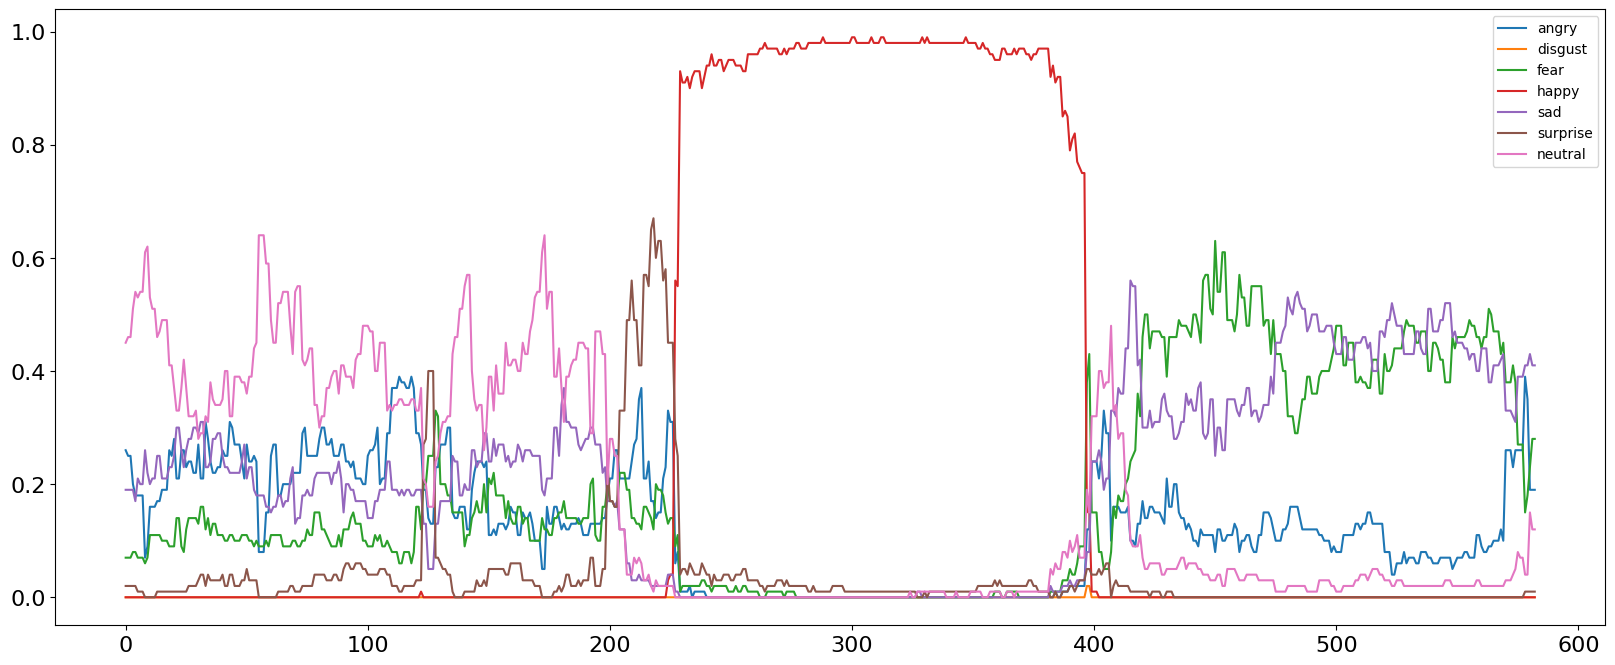

,Human Emotions,Emotion Value from the Video
0,Angry,71.73
1,Disgust,0.04
2,Fear,106.76
3,Happy,162.13
4,Sad,119.51
5,Surprise,24.10
6,Neutral,97.46


Video 2 Data:


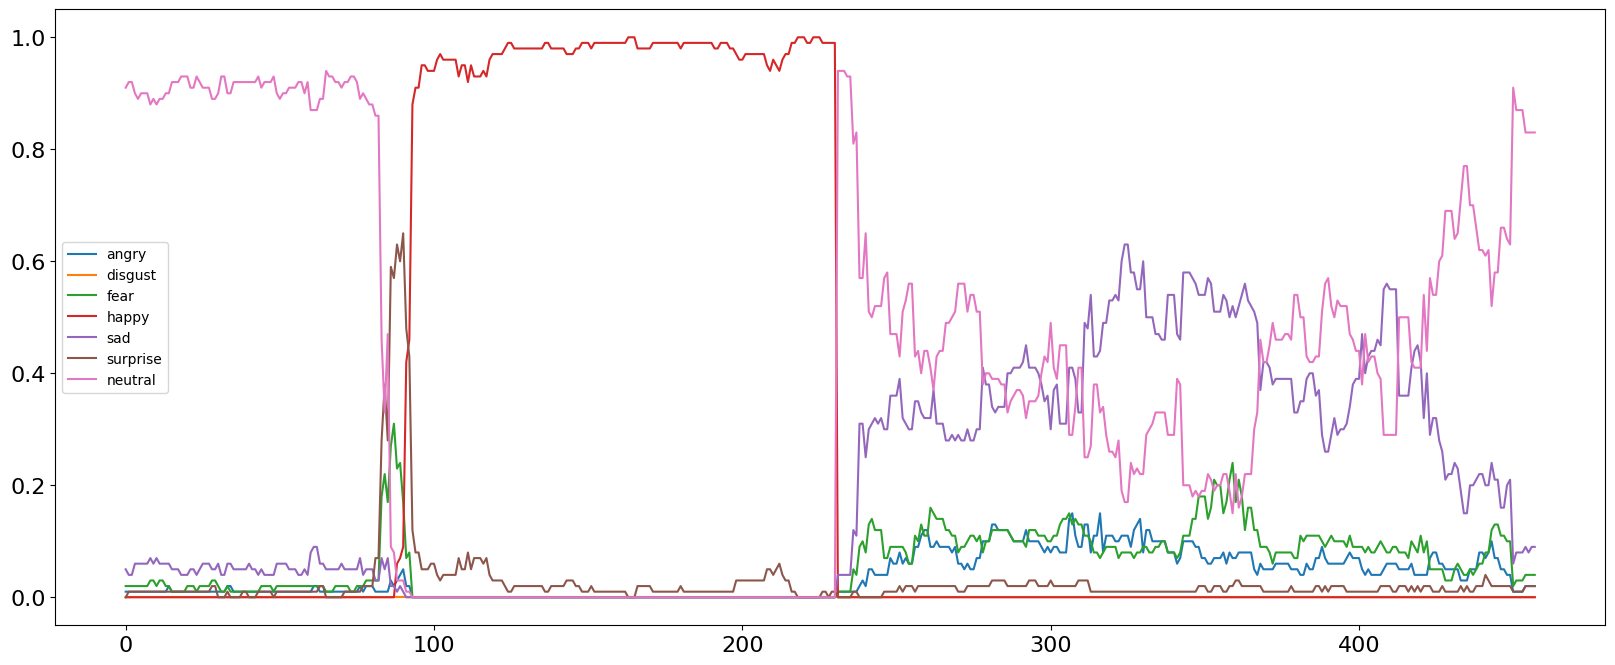

,Human Emotions,Emotion Value from the Video
0,Angry,17.27
1,Disgust,0.00
2,Fear,25.47
3,Happy,135.61
4,Sad,87.84
5,Surprise,12.56
6,Neutral,178.99


In [9]:
print("Video 1 Data:")
df_process(vid1_data, vid1)
print("Video 2 Data:")
df_process(vid2_data, vid2)

# 2

Attached is [`six-two.py`](./six-two.py), a script that either processes your live video feed, or instead uses a prerecorded video provided as a command line input.

```py
py .\six-two.py [--video]
```

to run the demo from this main folder you can run 

```py
py .\six-two.py .\res\Q6Videos\demo.mp4
```

# 3

## Logical applications

For robots who's goal is to replace service oriented or font facing positions such as cashiers, waiters, or even teachers; the robot needs to be able to understand what someone is telling them.  The biggest issue, however, is that the majority of human communication is portrayed through body language, tone of voice, etc.  Robots can use information on what a subject is feeling in order to better serve them, for example recommending stress relief products a user that they determine to be stressed using their prediction models.

## Ethical Concerns

When it comes to an ethical perspective, engineers have the responsibility of using this much data about a person responsibly.  Being able to properly track human emotions also has the added effect of being able to train your models to cause certain emotions to occur.  This means that, for example, if a model detects that people buy more food when they're depressed or upset, they can change the environment around a user to create these emotions inside them.  It dehumanizes emotions away from a feeling into a binary state.  Ethically, our models and AI's should aim to increase happiness whenever possible, or maintain the mood that a user first entered with,  It's very unethical to take this information to create a model to ruin someone's mood.

Similarly to how many image detection models fail to recognize people of color, many emotional models may also exhibit some bias towards certain minority groups.  People who's emotions are abnormal to the average model, such as those with autism or bipolar disorder, can many times be misclassified based solely off a number generated by these type of algorithms.  Using these types of ratings to limit access to jobs or program placements may end up discriminating against those whose emotions we can't easily recognize.

## Legality

Legally, programmatically analyzing one's emotions can be seen as a violation of privacy.  Storing and using this data for products such as advertising or commercial gain without a user's explicit permission *should* go against many privacy laws, and in cases of measuring the emotions of children may violate CIPA (Children's Internet Protection Act).  

Pairing this information with technologies like automated police stops or medical evaluation can have dangerous consequences as well, leading to a world the likes of *minority report*.  


# 4

Attached is also `six-four.py`, a modification to the originaal script that allows two faces to be processed simultaneously.